# Bank Personal Loan Modelling:- Identifying the Potential Customers for Loans.
 
  Context:
 This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers
 are liability customers (depositors) with varying sizes of deposits. The number of customers who are
 also borrowers (asset customers) is quite small, and the bank is interested in expanding this base
 rapidly to bring in more loan business and in the process, earn more through the interest on loans. In
 particular, the management wants to explore ways of converting its liability customers to personal loan
 customers (while retaining them as depositors).
 A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over
 9% success. This has encouraged the retail marketing department to devise campaigns with better
 target marketing to increase the success ratio with minimal budget
 
 Objective:
 The department wants to build a model that will help them identify the potential customers who have
 a higher probability of purchasing the loan. This will increase the success ratio while at the same time
 reduce the cost of the campaign.
 
 Dataset Description:
 The dataset contains data on 5000 customers. The data include customer demographic information
 (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and
 the customer response to the last personal loan campaign (Personal Loan). Among these 5000
 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier
 campaign.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import scipy.stats as stats

# Loading the dataset.

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.shape

(5000, 14)

In [6]:
df.size

70000

# Descriptive Statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [10]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['Experience'] = df['Experience'].abs()

In [13]:
df['Experience'].min()

0

In [14]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

In [15]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [16]:
df.groupby(['Personal Loan']).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [17]:
# Visuali

In [18]:
X = df.drop('Personal Loan', axis =1)
y = df['Personal Loan']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3,random_state = 1)

# visualisation

In [20]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

<Axes: >

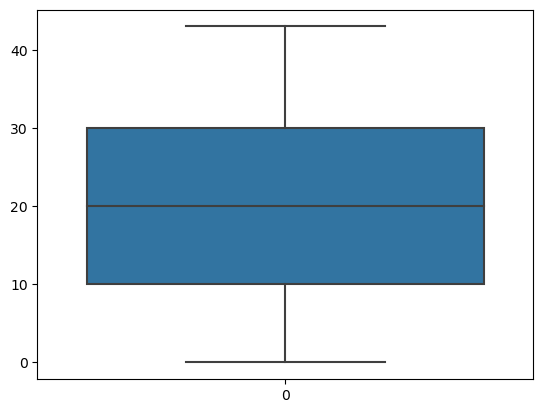

In [21]:
sns.boxplot([df['Experience']])

<Axes: >

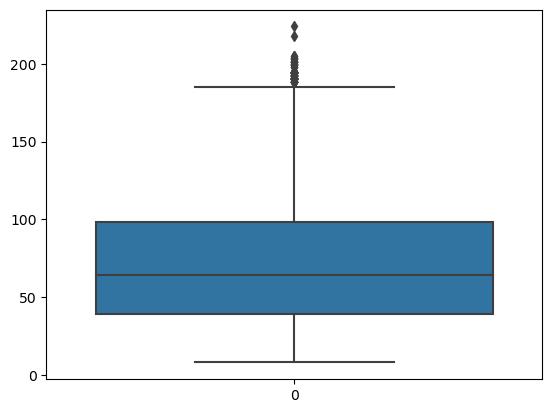

In [22]:
sns.boxplot(df['Income'])

<Axes: >

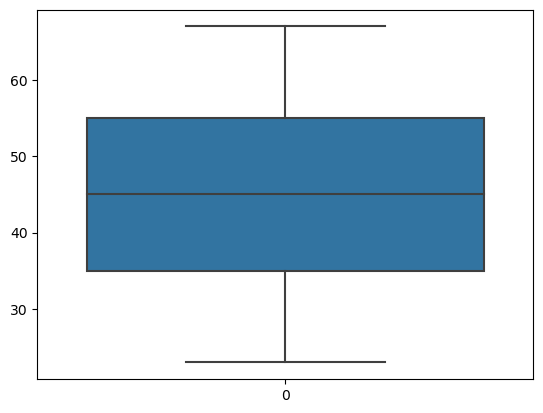

In [23]:
sns.boxplot(df['Age'])

<Axes: >

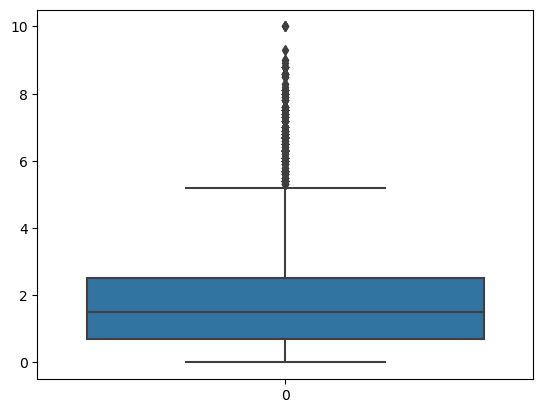

In [24]:
sns.boxplot(df['CCAvg'])

<Axes: >

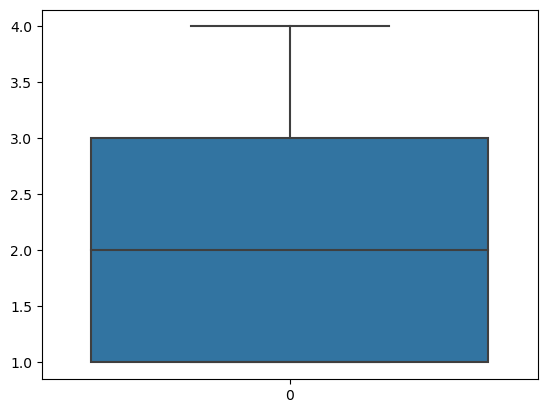

In [25]:
sns.boxplot(df['Family'])

<Axes: >

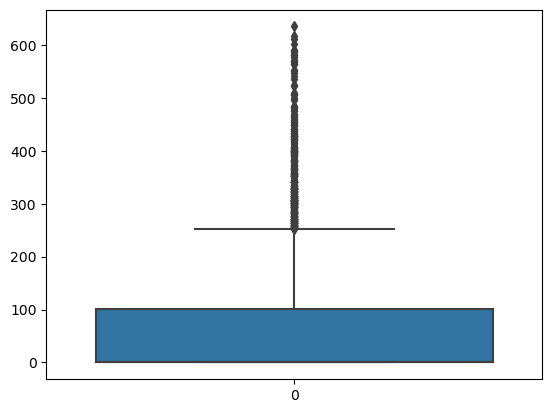

In [26]:
sns.boxplot(df['Mortgage'])

<Axes: xlabel='Family', ylabel='count'>

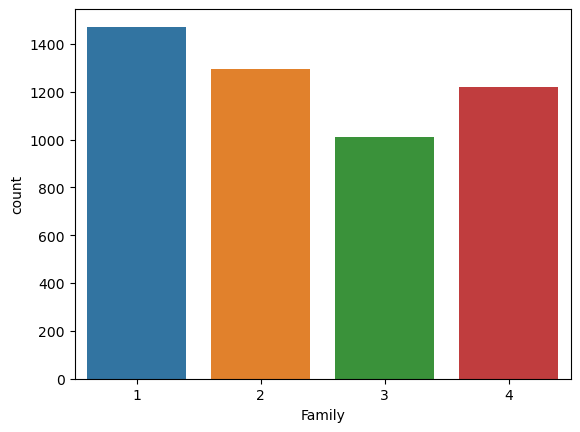

In [27]:
sns.countplot(x = df['Family'])

<Axes: xlabel='Online', ylabel='count'>

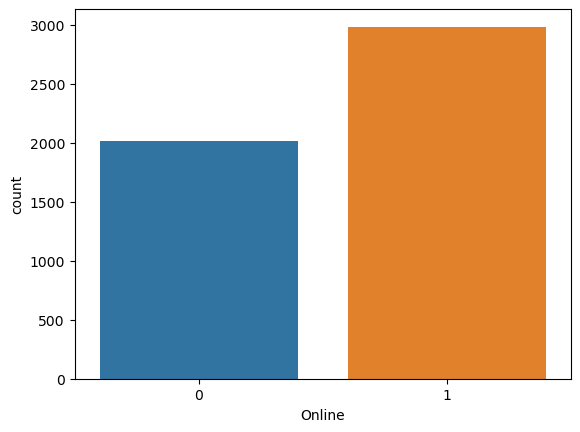

In [28]:
sns.countplot(x = df['Online'])

<Axes: xlabel='Education', ylabel='count'>

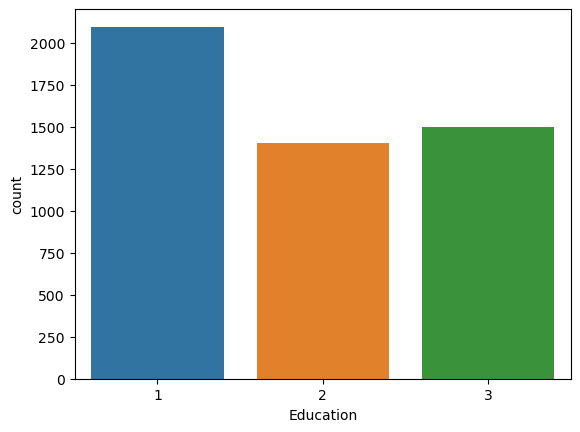

In [29]:
sns.countplot(x = df['Education'])

<Axes: xlabel='CreditCard', ylabel='count'>

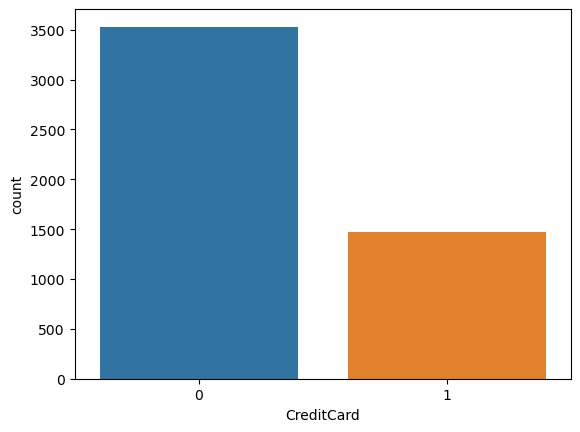

In [30]:
sns.countplot(x = df['CreditCard'])

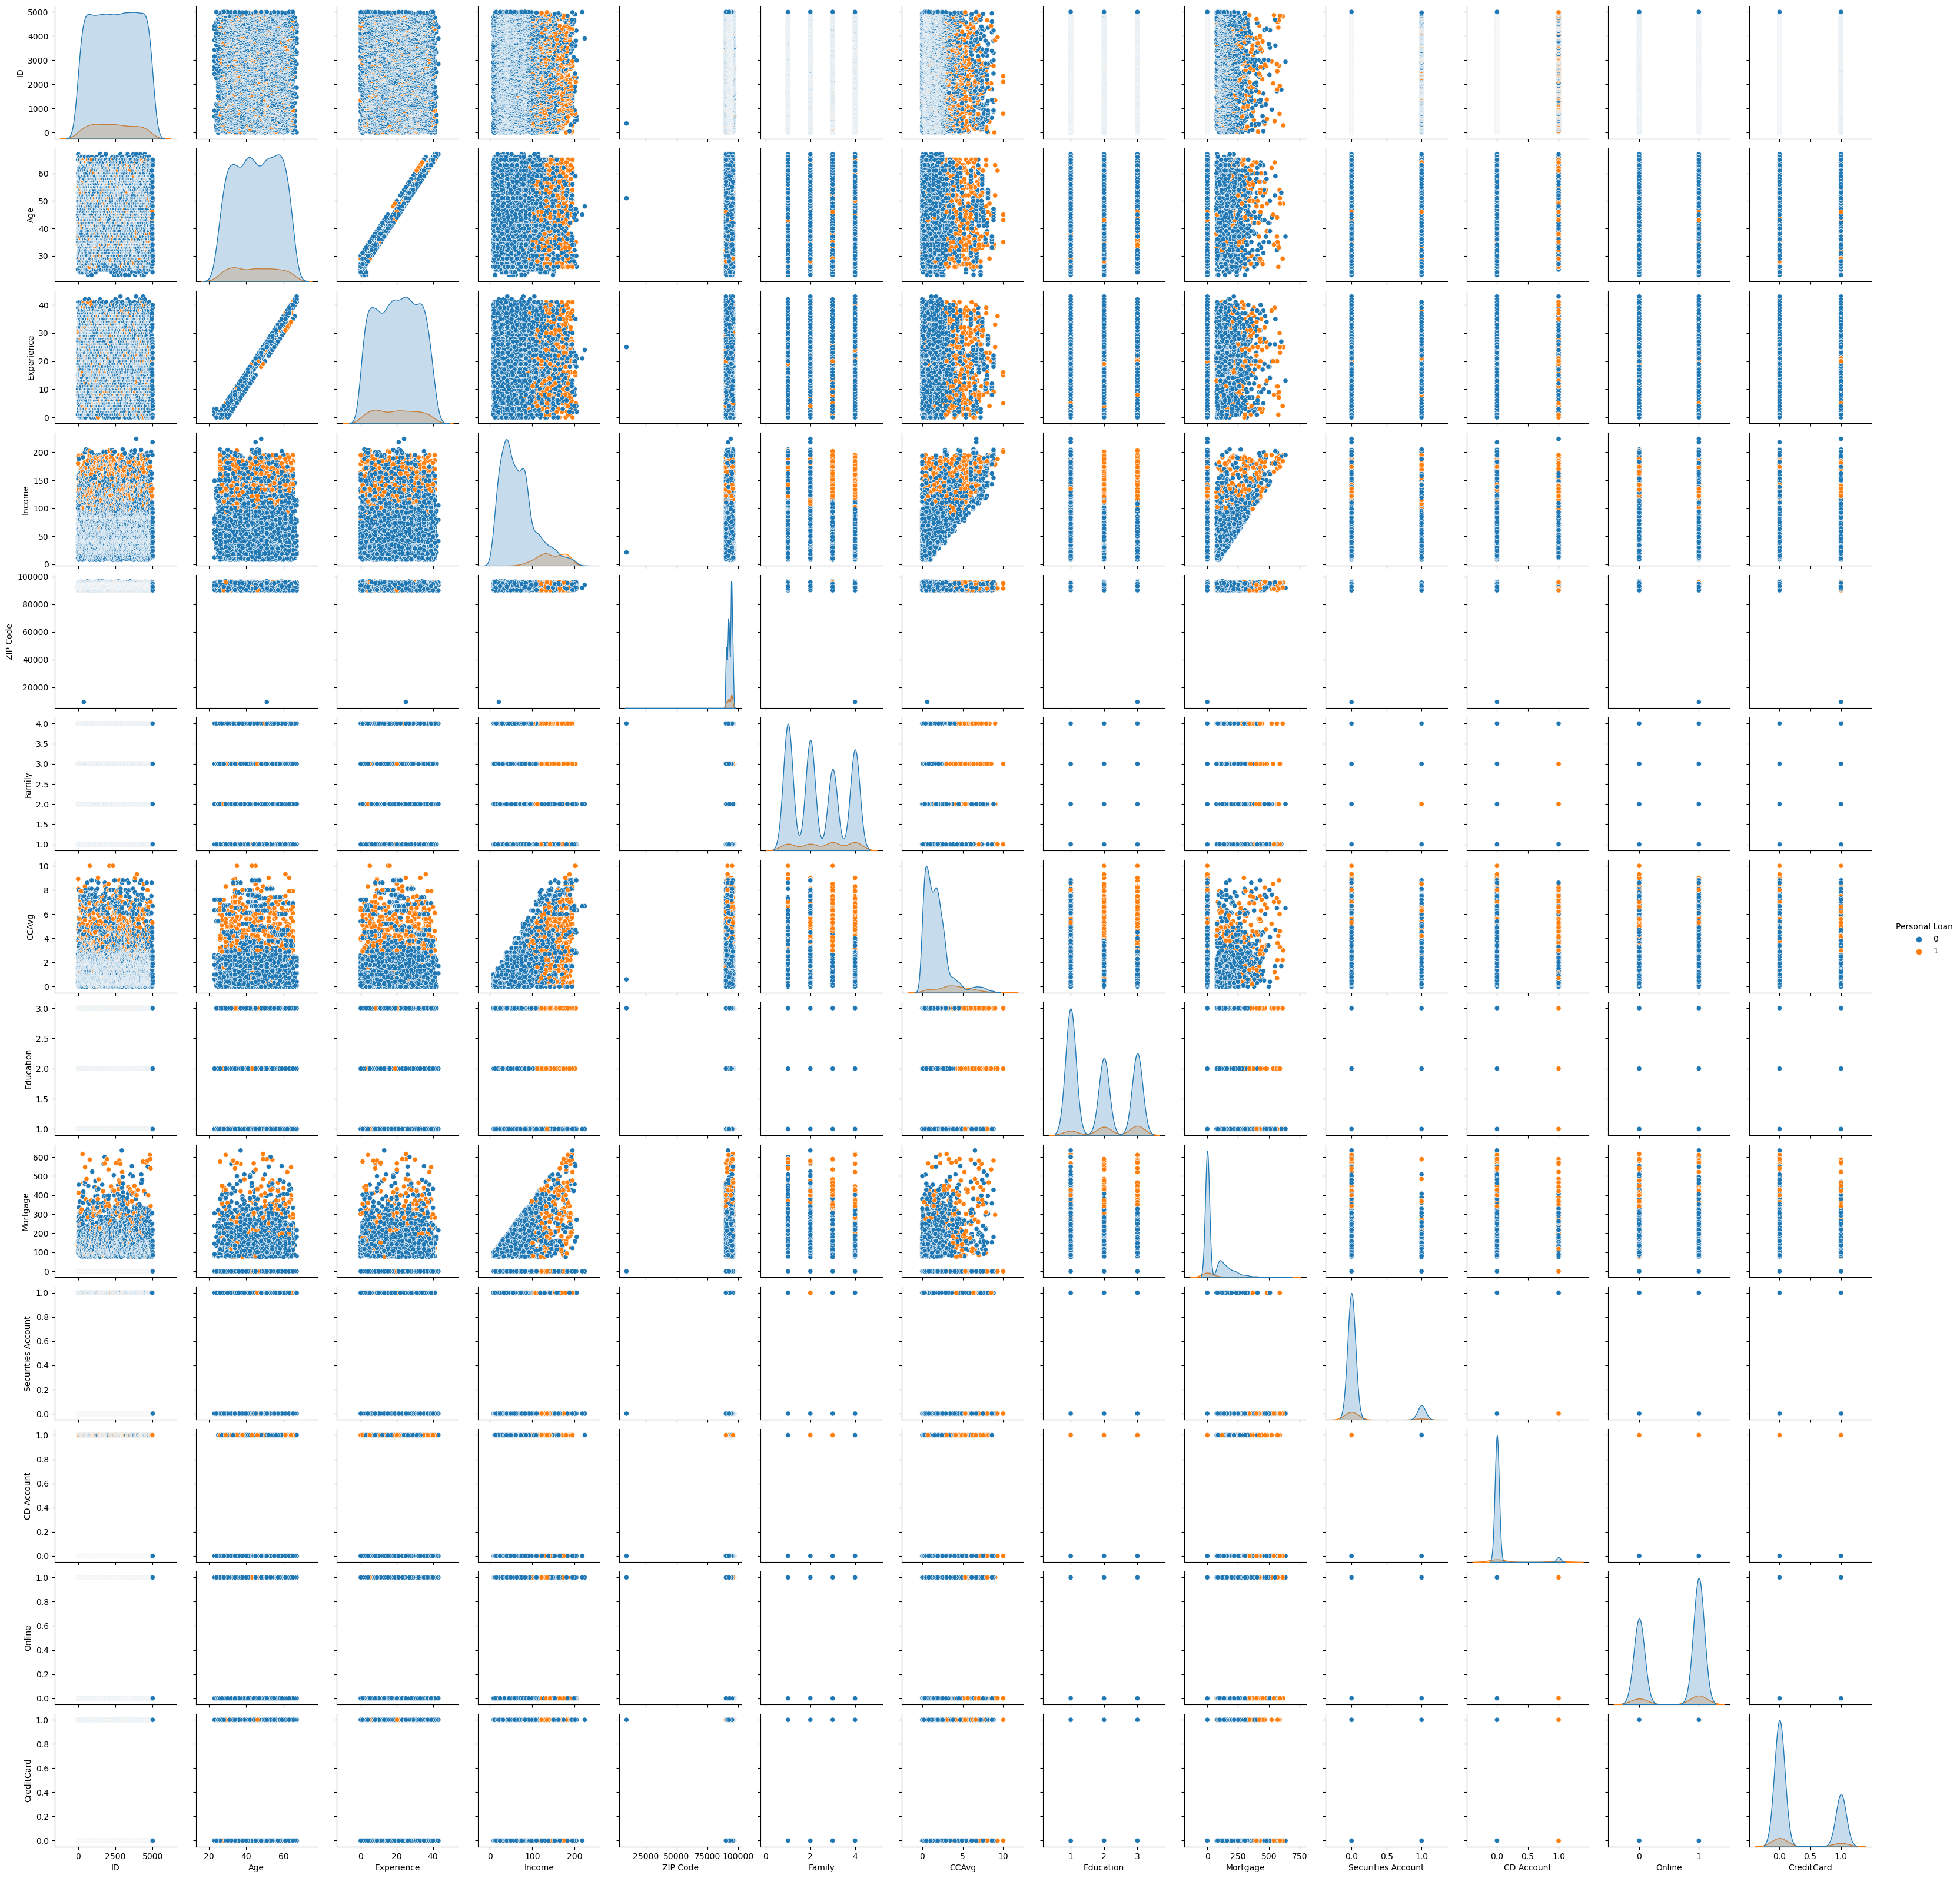

In [31]:
sns.pairplot(df,hue = 'Personal Loan')

# Logistic Regression 

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict  = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))

0.9133333333333333
[[1319   32]
 [  98   51]]


C:\Users\chetu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.61      0.34      0.44       149

    accuracy                           0.91      1500
   macro avg       0.77      0.66      0.70      1500
weighted avg       0.90      0.91      0.90      1500



# GaussianNB

In [34]:
model2 = GaussianNB()
model2.fit(X_train,y_train)
y_predict2 = model2.predict(X_test)
model_score2 = model2.score(X_test,y_test)
print(model_score2)
print(metrics.confusion_matrix(y_test,y_predict2))

0.8826666666666667
[[1239  112]
 [  64   85]]


In [35]:
print(metrics.classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.57      0.49       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



# KNN

In [36]:
model3 = KNeighborsClassifier(n_neighbors = 3 , weights = 'distance')
model3.fit(X_train,y_train)
y_predict3 = model3.predict(X_test)
model_score3 = model3.score(X_test, y_test)
print(model_score3)
print(metrics.classification_report(y_test,y_predict3))

0.8906666666666667
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1351
           1       0.26      0.05      0.09       149

    accuracy                           0.89      1500
   macro avg       0.58      0.52      0.52      1500
weighted avg       0.84      0.89      0.86      1500



# scaling(Z-score)

In [37]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)


In [38]:
model3.fit(X_train_scaled,y_train)
KNN_y_predict = model3.predict(X_test_scaled)
KNN_model_score = model3.score(X_test_scaled,y_test)
print(KNN_model_score)
print(metrics.classification_report(y_test,KNN_y_predict))

0.9453333333333334
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.89      0.52      0.65       149

    accuracy                           0.95      1500
   macro avg       0.92      0.75      0.81      1500
weighted avg       0.94      0.95      0.94      1500

